<a href="https://colab.research.google.com/github/fatimagamal/Dashboards/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CI NO:** #CI825

**Created by :** Fatma Gamal

**Created on :** 27-08-2025

### **QC Number Decects Per Line**

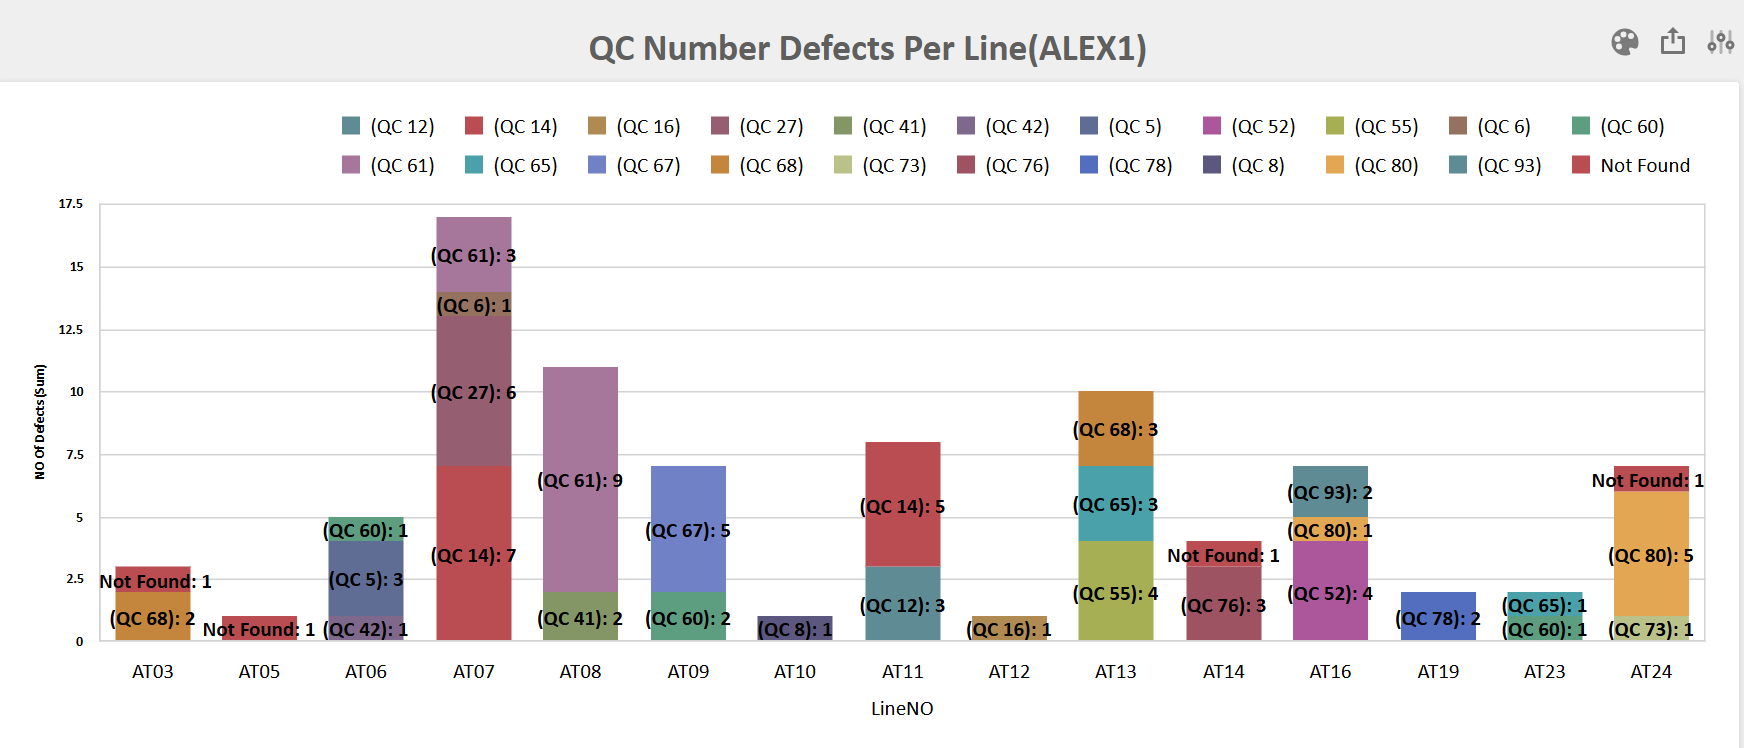

this Dashboard To monitor and analyze the total defects reported by each QC (Quality Controller) across all production lines, with flexible date filtering for detailed performance tracking.

In [ ]:
select
LD2.[Desc] as 'LineNO'
,QAL.ErrorSize as 'NO Of Defects'
,CASE
    WHEN QAL.QCNumber IS NULL
         OR QAL.QCNumber = ''
         OR QAL.QCNumber = 'NULL'
    THEN 'Not Found'
    ELSE '(QC ' + QAL.QCNumber + ')'
END AS [QC Number]
from YNSALX01.xQua_QualityAssuranceConfFinal qh(nolock)
inner join YNSALX01.xMas_LovDetail LD(nolock) on LovId=1127 and Lang='EN'and Value=qh.Result

left join YNSALX01.xMas_LovDetail LD2(nolock) on LD2.LovId=1098 and LD2.Lang='EN' and LD2.[Value]=qh.LineNumber
left join YNSALX01.xQua_QualityAssuranceConfFinalLine QAL (NOLOCK) on   QAL.HeaderID = qh.ID

where InspectionDate between  @startDate and @endDate   and qh.InspectionControlType=2 and qh.Factory=1 and qh.Final=1 and ((QAL.ErrorSize is not NULL )OR(QAL.QCNumber is not NULL) )


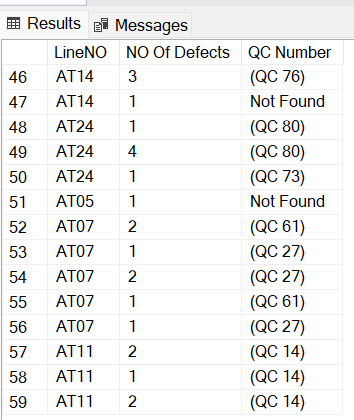